In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# BI-RADS is assessment of how confident the severity classification is; it is not a predictive attribute
# Model will be built with features of Age, Shape, Margin, Density

### Data Preparation ###

names = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

data = pd.read_csv('mammographic_masses.data.txt', header=None, names=names, na_values='?')

data.head(20)
data.describe()


,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [2]:
data.loc[data["Age"].isnull() |
         data["Shape"].isnull() |
         data["Margin"].isnull() |
         data["Density"].isnull()]


,BI-RADS,Age,Shape,Margin,Density,Severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [3]:
# Missing data exists in dataset, drop every row missing data to prevent bias.
# No obvious correlation between attributes.
data.dropna(inplace=True)
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [4]:
# Convert Pandas dataframe to numpy array so it can be used by scikit_learn
labels = ["Age", "Shape", "Margin", "Density"]
feature_data = data[labels].values
classes = data["Severity"].values

In [5]:
from sklearn.preprocessing import StandardScaler

# Use fit_transform on training data
feature_data = StandardScaler().fit_transform(feature_data)
feature_data


array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(feature_data, classes, test_size=0.25)

# Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

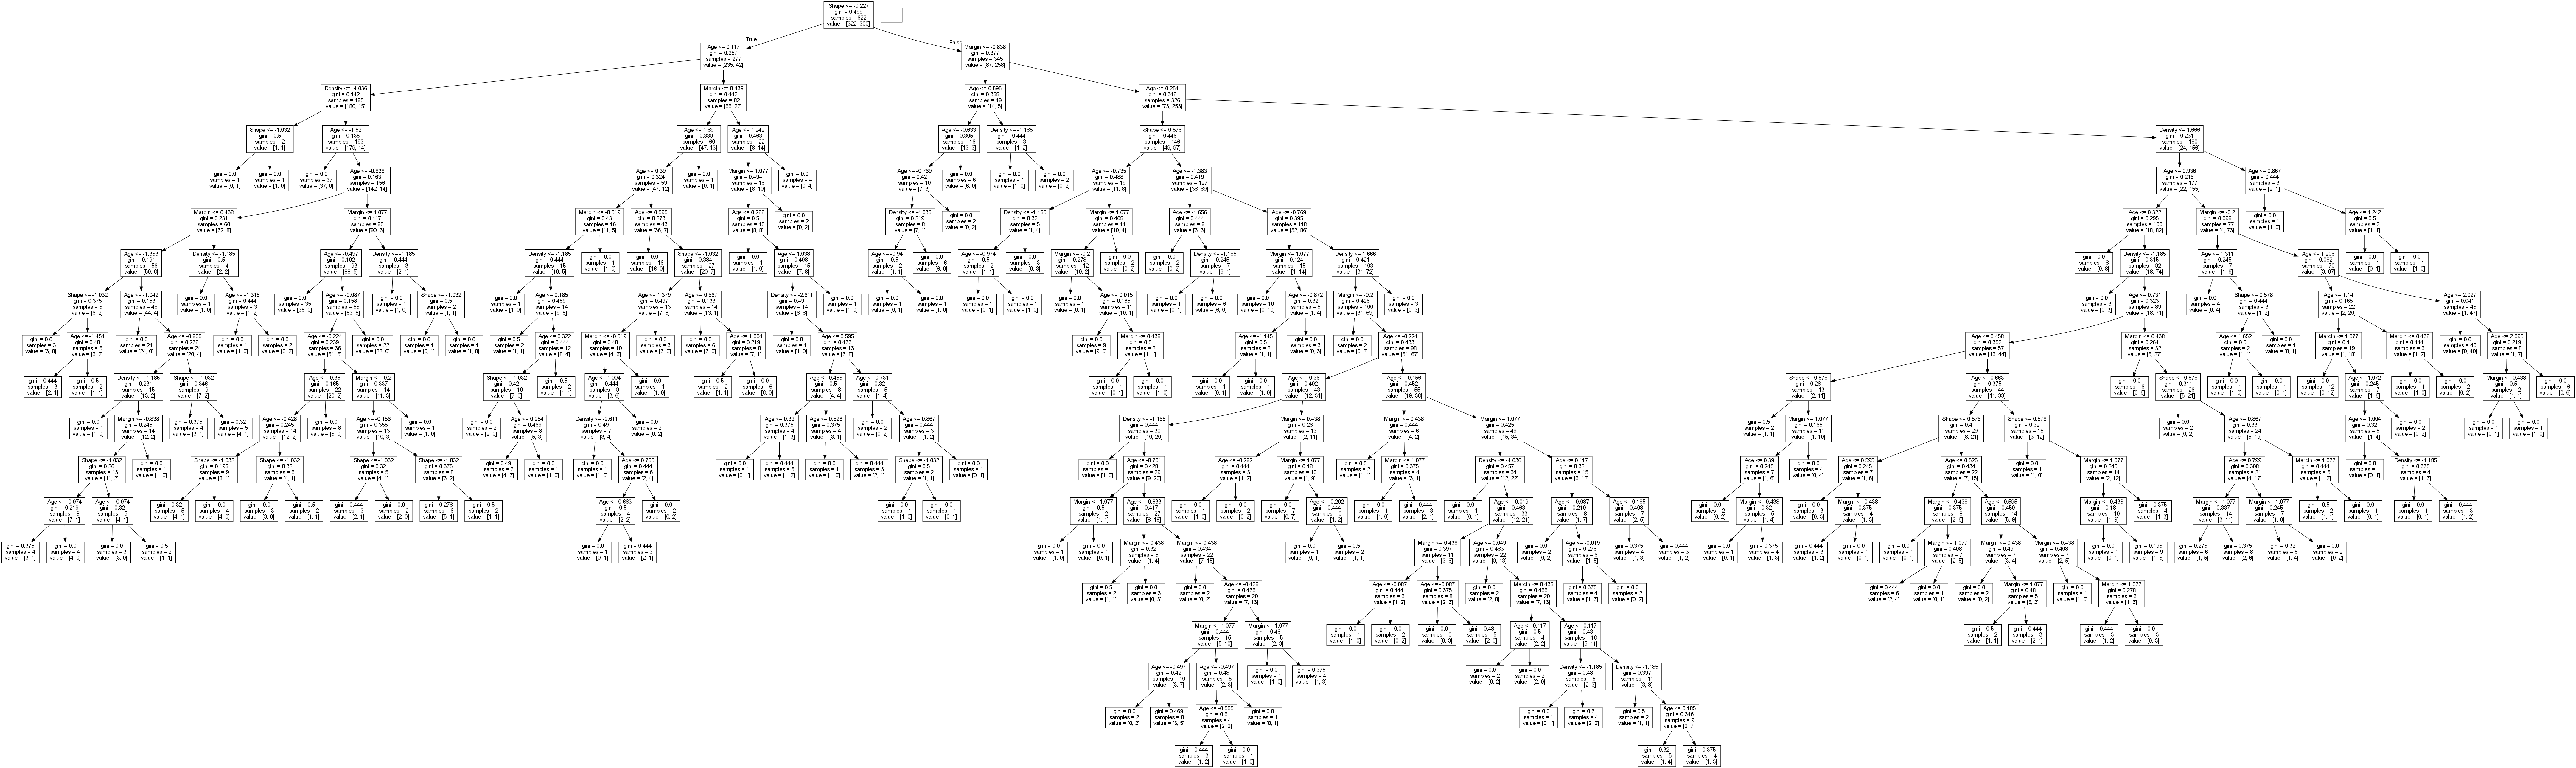

In [7]:

from IPython.display import Image
from six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=labels)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [8]:
clf.score(X_test, y_test)

0.7548076923076923

In [9]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, feature_data, classes, cv=10)
scores.mean()

0.736144578313253

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Testing accuracy of random forest model
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, feature_data, classes, cv=10)
scores.mean()


0.7686746987951808

0.7067307692307693